# Megaline Platform
The mobile company Megaline is not satisfied to see that many of its customers are still using legacy plans. They want to develop a model capable of analyzing customer behavior and recommending one of Megaline’s new plans: Smart or Ultra. <br>

You have access to behavioral data from subscribers who have already switched to the new plans.
For this classification task, you must create a model that selects the correct plan. <br>

Develop a model with the highest possible accuracy. In this project, the accuracy threshold is 0.75. Use the dataset to evaluate the model’s accuracy.


# Data Dictionary
Each observation in the dataset contains monthly behavioral information about a user. The data provided includes: <br>

- calls: number of calls
- minutes: total call duration in minutes
- messages: number of text messages
- mb_used: internet traffic used in MB
- is_ultra: plan for the current month (Ultra = 1, Smart = 0)

# 1. Initialization

In [15]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar clasification libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 1.1 Load the data

In [ ]:
# Loading the .csv file
df = pd.read_csv('\\users_behavior.csv')
df.info()
print()
print(df.sample(3)) # randomly checking the data
print()
print(df.isnull().sum()) # Reviewing if null values are in the dataset
print()
print(f"El numero de (filas, columnas) del dataset es: ", df.shape)
print(f"El numero de filas duplicadas es:", df.duplicated().sum()) # Reviewing duplicated data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB

      calls  minutes  messages   mb_used  is_ultra
1634   51.0   412.00     137.0  12155.46         1
1558   51.0   402.74      14.0  20391.14         0
1137   52.0   378.93     117.0  23449.04         1

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

El numero de (filas, columnas) del dataset es:  (3214, 5)
El numero de filas duplicadas es: 0


Comments: <br>
First, I made sure that the data in the dataframe had the required integrity.
It can be observed that there are no null values, and there are also no duplicate rows.
In this case, the data appears to be clean, allowing us to proceed with the analysis as stated in the instructions.

# 2. Dataset

### 2.1 Segmentation of the dataset

In [17]:
# Segmentation of the dataset
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

### 2.2 Split of the Dataset

In [18]:
# use of train_test to split the dataset
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# 3. Models

To select the models for training, we first consider the structure and meaning of the dataset. Since the target consists of discrete values, this is a classification problem. <br>
By this stage, all necessary libraries have been imported and the feature and target variables have been set up. <br>
The dataset is then split into training and testing subsets (75% for training and 25% for testing) to allow proper model evaluation before building the model.

### 3.1 DecisionTreeClassifier

In [19]:
# Model creating and training.
max_depth_dtc = 0
most_accurate_dtc = 0
depths = list(range(1,11))
accuracies = []

for depth in range(1, 11):
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dtc.fit(features_train, target_train)
    predictions = model_dtc.predict(features_test)
    accuracy = accuracy_score(target_test, predictions)
    accuracies.append(accuracy)
    print(f"max_depth={depth}: accuracy={accuracy:.8f}")
    if accuracy > most_accurate_dtc:
        max_depth_dtc = depth
        most_accurate_dtc = accuracy

print()
print(f"the best model accuracy on the validation set (max_depth = {max_depth_dtc}): {most_accurate_dtc:.8f}")

max_depth=1: accuracy=0.75000000
max_depth=2: accuracy=0.78358209
max_depth=3: accuracy=0.78855721
max_depth=4: accuracy=0.78109453
max_depth=5: accuracy=0.78109453
max_depth=6: accuracy=0.76616915
max_depth=7: accuracy=0.78980100
max_depth=8: accuracy=0.78855721
max_depth=9: accuracy=0.78855721
max_depth=10: accuracy=0.78731343

the best model accuracy on the validation set (max_depth = 7): 0.78980100


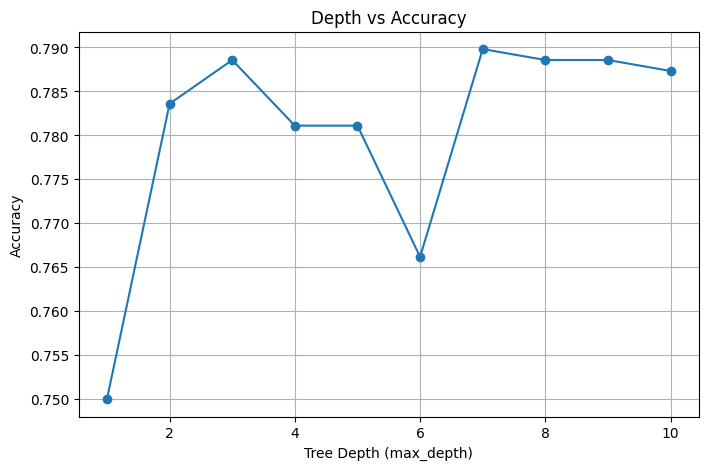

In [20]:
# plot accuracy vs. depth (looking for overfitting)
plt.figure(figsize= (8,5))
plt.plot(depths, accuracies, marker='o')
plt.title("Depth vs Accuracy")
plt.xlabel("Tree Depth (max_depth)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

The model with the best depth appears to be depth 7, with an accuracy of approximately 79%. However, the plot shows an increase in accuracy only up to depth 3. The highest point suggests that the model may be overfitting. Therefore, in this model, the optimal depth—without risking overfitting—would be 3. <br>
<br>
This model shows a certain level of reliability to begin drawing conclusions and analyzing user behavior based on their consumption characteristics. However, higher accuracy will be sought by using a new model (LogisticRegression).

### 3.2 LogisticRegression

In [21]:
# Model creating and training.
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train)
score_train = model_lr.score(features_train, target_train)
score_test = model_lr.score(features_test, target_test)

print("Accuracy of the logistic regression model on the training set:", score_train)
print("Accuracy of the logistic regression model on the test set:", score_test)

Accuracy of the logistic regression model on the training set: 0.74149377593361
Accuracy of the logistic regression model on the test set: 0.753731343283582


For this stage, I have two tested models: <br>

- DecisionTreeClassifier ~ 79%
- LogisticRegression ~ 75%

Both models show reasonable strength in accuracy. I will continue with RandomForestClassifier to complete the comparison and determine a conclusion regarding user behavior in relation to their data usage and their legacy plan.

### 3.3 RandomForestClassifier

In [22]:
# Model creating and training.
best_model_rf = None
best_result_rf = 0
best_est_rf = 0

for est in range(10, 51, 10):
    model_rf = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_rf.fit(features_train, target_train)
    result_rf = model_rf.score(features_test, target_test)

    if result_rf > best_result_rf:
        best_model_rf = model_rf
        best_result_rf = result_rf
        best_est_rf = est

    print(f"n_estimators:{est}, y exactitud={result_rf:.6f}")
print()
print(f"the best model has n_estimators={best_est_rf} and accuracy:{best_result_rf:.6f}")

n_estimators:10, y exactitud=0.789801
n_estimators:20, y exactitud=0.788557
n_estimators:30, y exactitud=0.792289
n_estimators:40, y exactitud=0.792289
n_estimators:50, y exactitud=0.797264

the best model has n_estimators=50 and accuracy:0.797264


### 3.4 Sanity Check

In [23]:
# Import library
from sklearn.dummy import DummyClassifier

# Training the best model
best_model = RandomForestClassifier(random_state=12345, n_estimators=50)
best_model.fit(features_train, target_train)
best_result = best_model.score(features_test, target_test)

# Final evaluation
final_accuracy = best_model.score(features_test, target_test)

# Applying the sanity check
dummy_model = DummyClassifier(strategy='most_frequent', random_state=12345)
dummy_model.fit(features_train, target_train)
dummy_accuracy = dummy_model.score(features_test, target_test)

# Results
print(f"Modelo final: {final_accuracy:.6f}")
print(f"Modelo 'dummy': {dummy_accuracy:.6f}")

Modelo final: 0.797264
Modelo 'dummy': 0.700249


The model demonstrates its effectiveness, as its accuracy exceeds that of the dummy model, indicating that the selected model is genuinely learning from the dataset’s features. <br>

- RandomForest model: 79.7% accuracy
- Dummy model: 70.0% accuracy
- Difference: ~9.7 percentage points

# 4. Conclusion
To address Megaline’s objective of recommending the “Smart” and “Ultra” plans to users who remain on legacy plans, three classification models were trained and evaluated using the users’ behavioral data. <br>
Based on the results of the three models:
- Random Forest: Turned out to be the model with the highest accuracy at 0.797264.
- Decision Tree: Performed well, showing an increase up to depth 3, reaching an accuracy of 0.78855721 on the validation set.
- Logistic Regression: Was the model with the lowest accuracy, achieving 0.75373.

All three models exceeded the required accuracy threshold. However, the Random Forest stands out as the best option for the telecommunications company to accurately predict the most suitable plan for each user, providing higher precision and better predictive capability.